In [1]:
!pip3 install vnstock
from vnstock import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

import warnings

warnings.filterwarnings('ignore')

In [3]:
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")


In [4]:
VND = VND[['Close']]
VND

,Close
Time,
2017-06-02,3280
2017-06-05,3280
2017-06-06,3320
2017-06-07,3590
2017-06-08,3540
...,...
2023-12-11,21950
2023-12-12,22050
2023-12-13,21600


In [5]:
VND['Target'] = VND.Close.shift(-1)
VND.dropna(inplace = True)
VND.head()

,Close,Target
Time,,
2017-06-02,3280,3280.0
2017-06-05,3280,3320.0
2017-06-06,3320,3590.0
2017-06-07,3590,3540.0
2017-06-08,3540,3560.0


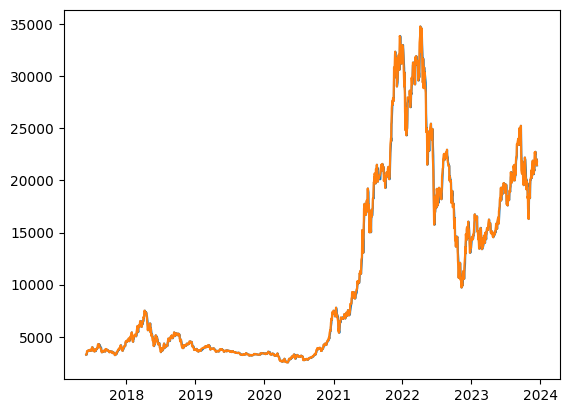

In [6]:
X = VND[['Close']]
y = VND[['Target']]

plt.plot(X)
plt.plot(y)
plt.show()

In [7]:
# chia train, test
train_size = int(0.7 * len(VND))
test_size = len(VND) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [8]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [9]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)


In [10]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))
msle_poly = mean_squared_log_error(y_test, y_pred_poly)


In [11]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)
print("RBF MSLE: ", msle_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)
print("Poly MSLE: ", msle_poly)

RBF MAPE: 3.0728132399441535
RBF MAE:  614.0757867227267
RBF Testing RMSE: Target    907.944259
dtype: float64
RBF MSLE:  0.0016713313410666986
Poly MAPE: 15.525863056991948
Poly MAE: 3205.086010232923
Poly Testing RMSE: Target    4434.036941
dtype: float64
Poly MSLE:  0.03580686046697397


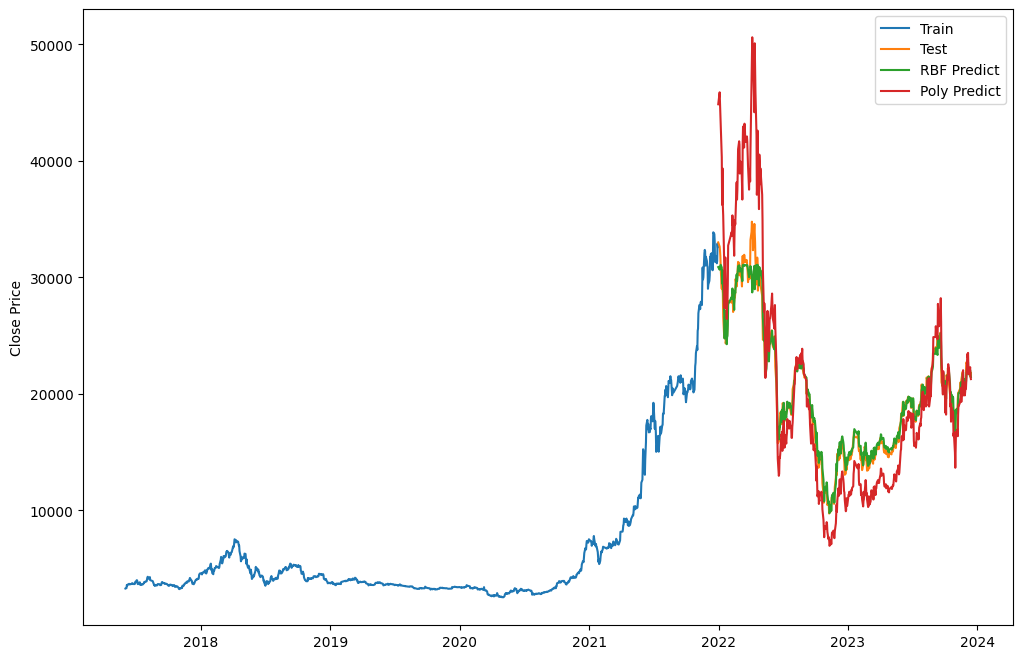

In [12]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [13]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = VND.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[21450]])

In [14]:
# tạo mảng chứa giá trị predict của 60 ngày tiếp theo
x_next_60_days_rbf = []
x_next_60_days_poly = []
# predict giá Close 60 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_60_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_60_days_poly)

Kết quả dự đoán sử dụng RBF: [array([21434.02144778]), array([21418.32676306]), array([21402.90872725]), array([21387.76038996]), array([21372.87505683]), array([21358.24627793]), array([21343.86783676]), array([21329.73373975]), array([21315.83820628]), array([21302.17565922]), array([21288.74071586]), array([21275.52817939]), array([21262.53303068]), array([21249.75042054]), array([21237.17566231]), array([21224.80422484]), array([21212.63172579]), array([21200.65392524]), array([21188.86671966]), array([21177.26613608]), array([21165.84832665]), array([21154.60956335]), array([21143.54623303]), array([21132.65483262]), array([21121.93196464]), array([21111.37433286]), array([21100.97873818]), array([21090.7420747]), array([21080.661326]), array([21070.73356155]), array([21060.9559333]), array([21051.32567247]), array([21041.84008637]), array([21032.49655555]), array([21023.29253085]), array([21014.22553083]), array([21005.29313908]), array([20996.49300185]), array([20987.82282563]),

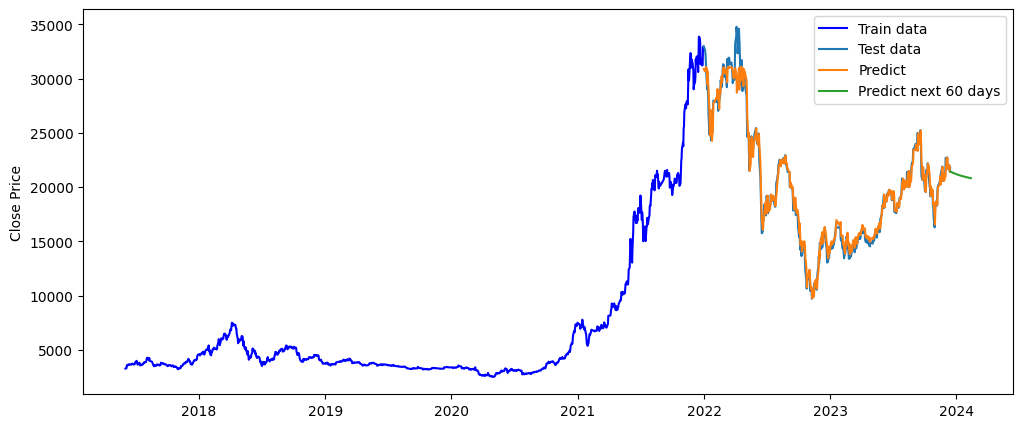

In [15]:
#vẽ mô hình
plt.figure(figsize=(12,5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred_rbf, label='Predict')

last_date = X_test.index[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
plt.plot(next_dates, x_next_60_days_rbf, label='Predict next 60 days')

plt.ylabel('Close Price')
plt.legend()
plt.show()

